# Point data and tops

Integrate point data with a striplog log for analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import striplog
striplog.__version__

'0.6.1'

In [2]:
from striplog import Legend, Lexicon, Interval, Component

In [3]:
legend = Legend.builtin('nsdoe')

# Make a `well`

In [4]:
import welly
from welly import Well
welly.__version__

'0.1.0'

## Load a well and add deviation and a striplog

Use the `from_las()` method to load a well by passing a filename as a str. This is really just a wrapper for lasio but instantiates a Header, Curves, etc.

In [5]:
lasfile = "data/las/P-129_out.LAS"

In [6]:
w = Well.from_las(lasfile)
w

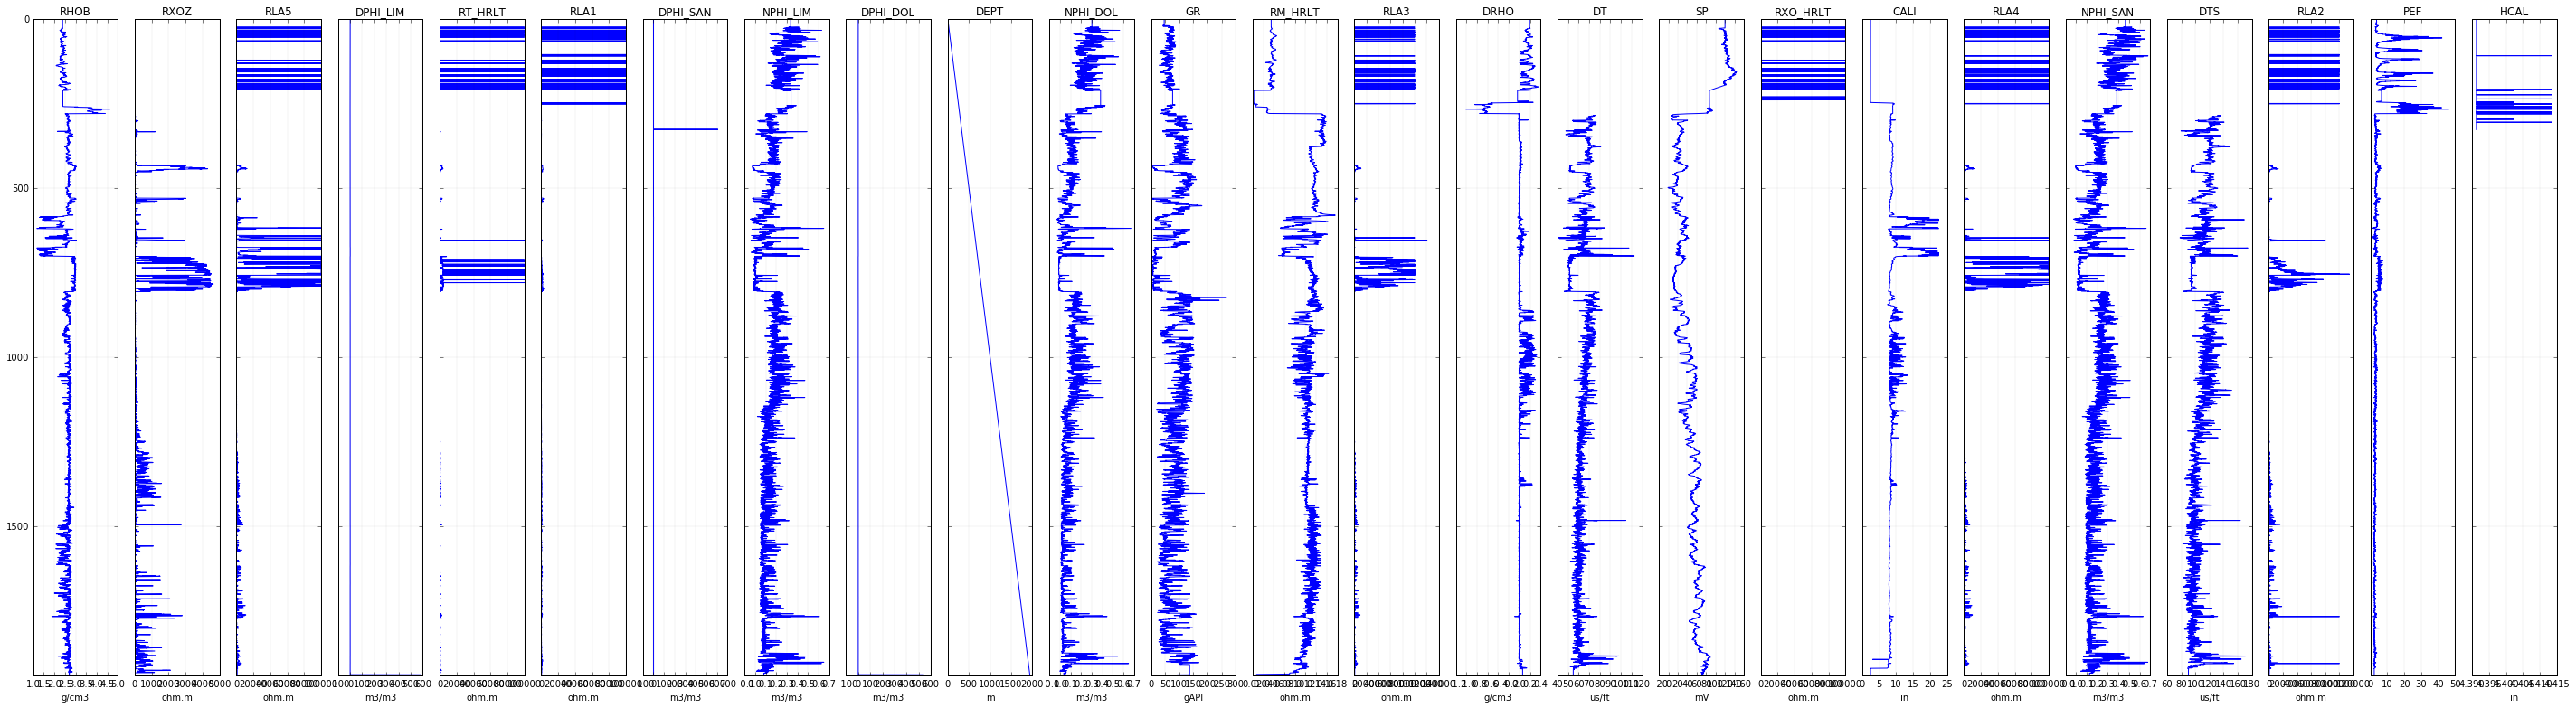

In [7]:
w.plot()

In [8]:
dev = np.loadtxt('data/deviation/P-129_deviation_survey.csv', delimiter=',', skiprows=9)
dev
w.location.add_deviation(dev[:, :3], td=1935)
w.location.md2tvd(1900)

/Users/Evan/anaconda/envs/welly/lib/python3.5/site-packages/welly/location.py:137: RuntimeWarning: divide by zero encountered in true_divide
  rf = 2 / dogleg * np.tan(dogleg / 2)  # ratio factor
/Users/Evan/anaconda/envs/welly/lib/python3.5/site-packages/welly/location.py:137: RuntimeWarning: invalid value encountered in multiply
  rf = 2 / dogleg * np.tan(dogleg / 2)  # ratio factor


array(1885.0585562024148)

# Make a `striplog` 

In [9]:
from striplog import Striplog
imgfile = "data/images/P-129_280_1935.png"

In [10]:
top, base = 280.0, 1935.0
strip = Striplog.from_image(imgfile, top, base, legend=legend)
strip

Striplog(185 Intervals, start=280.0, stop=1935.0)

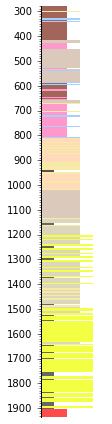

In [11]:
strip.plot(legend, ladder=True, aspect=4)

# Add striplog to well

In [12]:
w.data['strip'] = strip

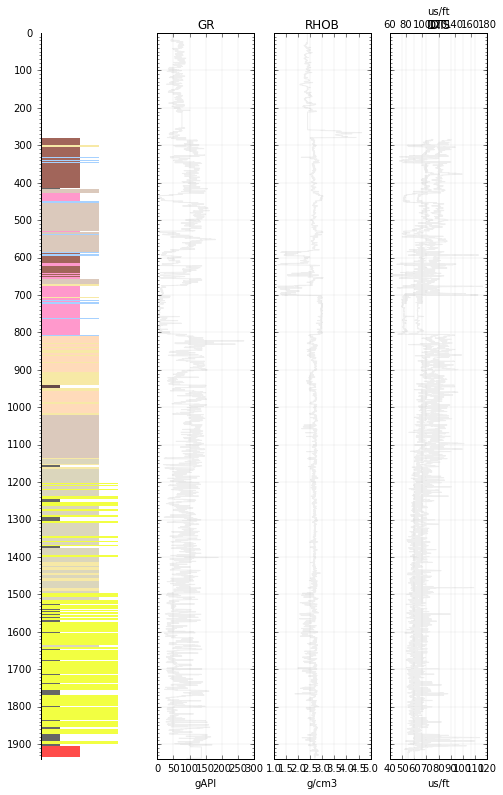

In [13]:
tracks = ['strip', 'GR', 'RHOB', ['DT', 'DTS']]
w.plot(tracks=tracks, legend=legend)

# Get template for petrophysical legend

In [14]:
#curve_template = 'data/templates/Petrophysics_display_template.csv'

In [15]:
curve_legend_csv = """colour,lw,xscale,curve mnemonic
#006400,1.0,linear,GR
#000000,1.0,log,RLA5
#000000,1.0,linear,RHOB
blue,1.0,linear,DT
green,1.0,linear,DTS
"""
curve_legend = Legend.from_csv(curve_legend_csv)
curve_legend

Legend(Decor({'colour': '#006400', 'width': None, 'hatch': None, 'lw': 1.0, 'xscale': 'linear', 'curve': Component({'mnemonic': 'gr'})})
Decor({'colour': '#000000', 'width': None, 'hatch': None, 'lw': 1.0, 'xscale': 'log', 'curve': Component({'mnemonic': 'rla5'})})
Decor({'colour': '#000000', 'width': None, 'hatch': None, 'lw': 1.0, 'xscale': 'linear', 'curve': Component({'mnemonic': 'rhob'})})
Decor({'colour': '#0000ff', 'width': None, 'hatch': None, 'lw': 1.0, 'xscale': 'linear', 'curve': Component({'mnemonic': 'dt'})})
Decor({'colour': '#008000', 'width': None, 'hatch': None, 'lw': 1.0, 'xscale': 'linear', 'curve': Component({'mnemonic': 'dts'})}))

In [16]:
complete_legend = legend + curve_legend

In [17]:
complete_legend.get_decor(w.data['GR'])

colour,#006400
width,None
hatch,None
lw,1.0
xscale,linear
curve,{'mnemonic': 'gr'}


# Add the curve's legend to the `nsdoe` legend

Use the `well.plot()` method to specific create a view of of `tracks`

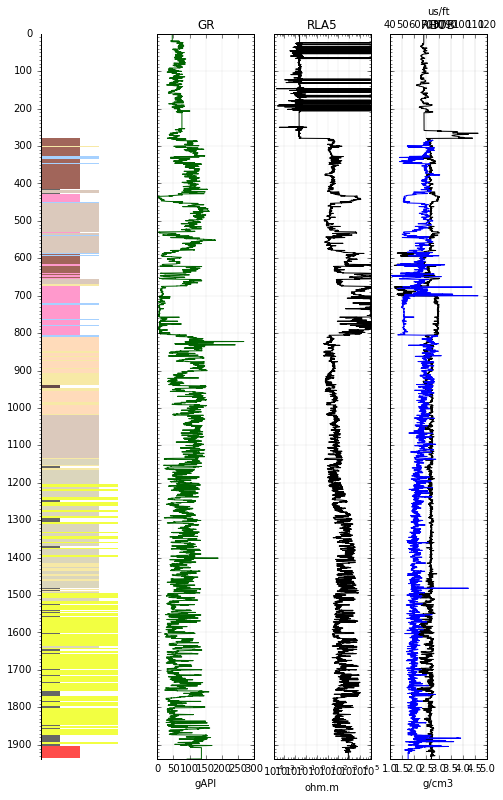

In [18]:
tracks = ['strip', 'GR', 'RLA5',['RHOB','DT']]
w.plot(tracks=tracks, legend=complete_legend)

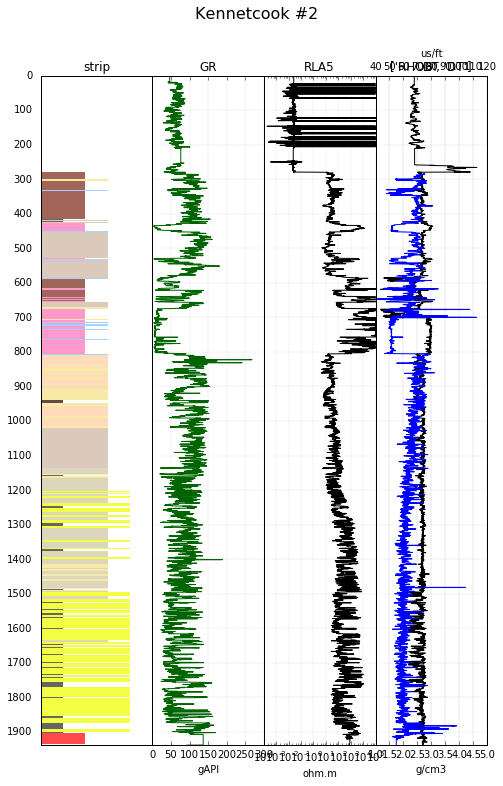

In [19]:
strip.name = "Strip"
w.plot_new(tracks=tracks, legend=complete_legend)

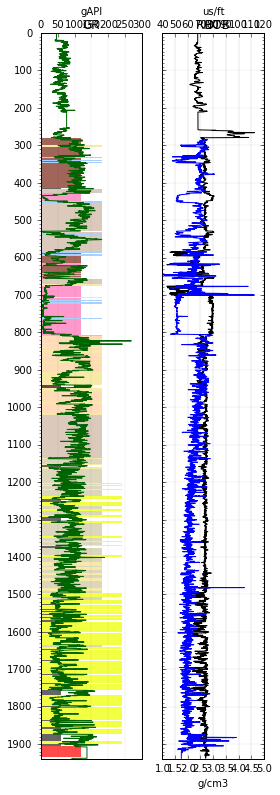

In [20]:
tracks = [['strip', 'GR'], ['RHOB','DT']]
w.plot(tracks=tracks, legend=complete_legend)

# Add tops to well

In [21]:
helen_tfile = 'data/tops/P-129_tops.csv'

In [22]:
import csv

def get_tops(fname, wellid):
    """
    Get all the tops corrsponding to the first column name of well
    """
    tops = ''
    with open(fname, 'r') as f:
        for line in f.readlines():
            row = line.strip().split(',')
            if row[0] == wellid:
                name = row[1]
                md = row[5]
                tops += md + ', ' + str(name) +  '\n '
    return tops

topslist = get_tops(helen_tfile, 'P-129')

In [23]:
topslist

'698.33, Lower Windsor\n 806.04, Horton\n 946.52, Horton Bluff FM\n 1906.35, Maguma\n 1938.46, TD\n '

In [24]:
from striplog import Lexicon

In [25]:
l = Lexicon.default()
l.formation = [r'\w+']

In [26]:
formations = Striplog.from_csv(topslist, lexicon=l, order='auto')
for frm in formations:
    print(frm.summary(fmt='{formation!t}'), frm.top.middle, '-',frm.base.middle)

107.71 m of Lower Windsor 698.33 - 806.04
140.48 m of Horton 806.04 - 946.52
959.83 m of Horton Bluff 946.52 - 1906.35
32.11 m of Maguma 1906.35 - 1938.46
1.00 m of Td 1938.46 - 1939.46


In [27]:
print(formations)

{'description': 'Lower Windsor', 'top': Position({'middle': 698.33, 'units': 'm'}), 'components': [Component({'formation': 'lower windsor'})], 'base': Position({'middle': 806.04, 'units': 'm'})}
{'description': 'Horton', 'top': Position({'middle': 806.04, 'units': 'm'}), 'components': [Component({'formation': 'horton'})], 'base': Position({'middle': 946.52, 'units': 'm'})}
{'description': 'Horton Bluff FM', 'top': Position({'middle': 946.52, 'units': 'm'}), 'components': [Component({'formation': 'horton bluff'})], 'base': Position({'middle': 1906.35, 'units': 'm'})}
{'description': 'Maguma', 'top': Position({'middle': 1906.35, 'units': 'm'}), 'components': [Component({'formation': 'maguma'})], 'base': Position({'middle': 1938.46, 'units': 'm'})}
{'description': 'TD', 'top': Position({'middle': 1938.46, 'units': 'm'}), 'components': [Component({'formation': 'td'})], 'base': Position({'middle': 1939.46, 'units': 'm'})}


In [28]:
strat_str = """colour,  width, comp formation
        #FFFFFF, 1, 
        #9999ff, 1, lower windsor
        #ffcc00, 1, horton
        #cc6600, 1, horton bluff
        #660033, 1, meguma
"""

In [29]:
tops_legend = Legend.from_csv(strat_str)
tops_legend

Legend(Decor({'colour': '#ffffff', 'width': 1.0, 'hatch': None, 'component': Component({})})
Decor({'colour': '#9999ff', 'width': 1.0, 'hatch': None, 'component': Component({'formation': 'lower windsor'})})
Decor({'colour': '#ffcc00', 'width': 1.0, 'hatch': None, 'component': Component({'formation': 'horton'})})
Decor({'colour': '#cc6600', 'width': 1.0, 'hatch': None, 'component': Component({'formation': 'horton bluff'})})
Decor({'colour': '#660033', 'width': 1.0, 'hatch': None, 'component': Component({'formation': 'meguma'})}))

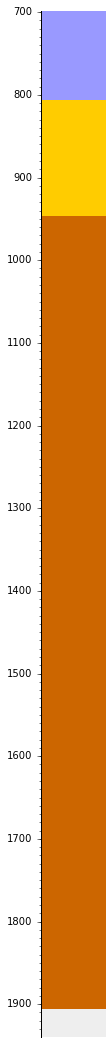

In [30]:
formations.plot(legend=tops_legend)

In [31]:
w.data['tops']=formations

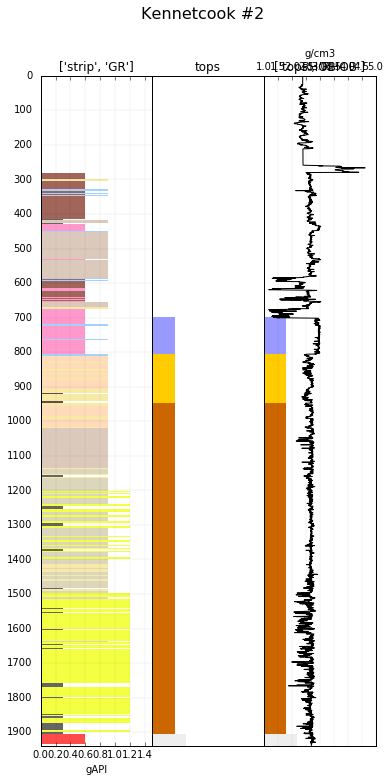

In [34]:
tracks = [['strip', 'GR'],'tops',['tops','RHOB']]
w.plot_new(tracks=tracks, legend=complete_legend+tops_legend)

## Handling point data 

Some things really are point data. Sort of like a log, but irregular, more discrete. Here are some lab measurements...

In [33]:
data_csv = """1200, 6.4
1205, 7.3
1210, 8.2
1250, 9.2
1275, 4.3
1300, 2.2
"""

You must specify points=True otherwise Striplog will 'fill in' and create the bases for you, based on the next top.


In [34]:
points = Striplog.from_csv(data_csv, points=True)

/Users/Evan/anaconda/envs/welly/lib/python3.5/site-packages/striplog/interval.py:96: UserWarning: You must provide a lexicon to generate components from descriptions.
  warnings.warn(w)
/Users/Evan/anaconda/envs/welly/lib/python3.5/site-packages/striplog/interval.py:96: UserWarning: You must provide a lexicon to generate components from descriptions.
  warnings.warn(w)
/Users/Evan/anaconda/envs/welly/lib/python3.5/site-packages/striplog/interval.py:96: UserWarning: You must provide a lexicon to generate components from descriptions.
  warnings.warn(w)
/Users/Evan/anaconda/envs/welly/lib/python3.5/site-packages/striplog/interval.py:96: UserWarning: You must provide a lexicon to generate components from descriptions.
  warnings.warn(w)
/Users/Evan/anaconda/envs/welly/lib/python3.5/site-packages/striplog/interval.py:96: UserWarning: You must provide a lexicon to generate components from descriptions.
  warnings.warn(w)
/Users/Evan/anaconda/envs/welly/lib/python3.5/site-packages/striplog/i

Make a list of point_locators (depths) and values

In [35]:
z = []
val = []
for point in points:
    z.append(point.top.middle)
    val.append(point.description)

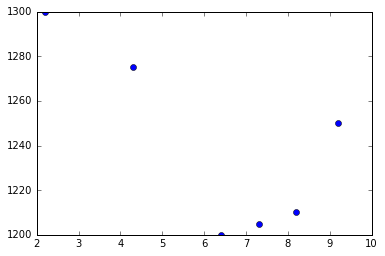

In [36]:
plt.plot(val,z,'o')

# Older style of plot

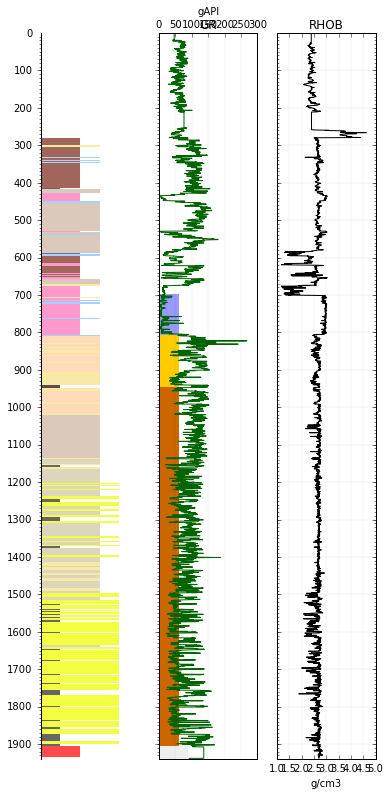

In [37]:
tracks = ['strip', ['tops','GR'],'RHOB']
f = w.plot(tracks=tracks, legend=complete_legend+tops_legend)

# Newer Plot

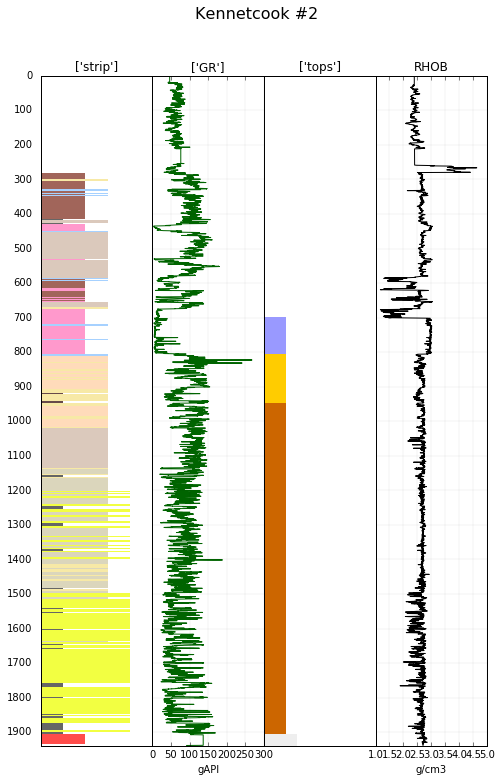

In [43]:
tracks = [['strip'],['GR'],['tops'],'RHOB']
f = w.plot_new(tracks=tracks, legend=complete_legend+tops_legend)

# Filtering an array with a striplog

I'd like to 'extract' the data from a log, only where there are intervals. Since we already have ways to filter the striplog to zones of interest (e.g. with find() or filter) it would be easy to, say, get the GR curve where the striplog indicates sandstone.


In [39]:
muds = P129.data['strip'].find('mudstone')

NameError: name 'P129' is not defined

In [40]:
type(muds)

NameError: name 'muds' is not defined

In [39]:
gr = P129.data['GR']
gr.size

12718

In [42]:
mud_flag, mfbasis, _ = P129.data['strip'].find('mudstone').to_log(basis=gr.basis, return_meta=True)
mud_flag
mfbasis.size

12718

In [ ]:
pdict = {'start':'','step', 'mnemonic', 'units':''}

In [33]:
mf = Curve(mud_flag

array([1, 1, 1, ..., 1, 1, 1])

In [26]:
P129.data['muds'] = muds
P129.data['mudflag'] = 200*mud_flag

In [27]:
# add a display style to the mudflag curve
mud_line = """colour,lw,xscale,curve mnemonic
#FF0000,0.5,linear,DEPT
"""
mud_legend = Legend.from_csv(mud_line)

In [45]:
%matplotlib inline

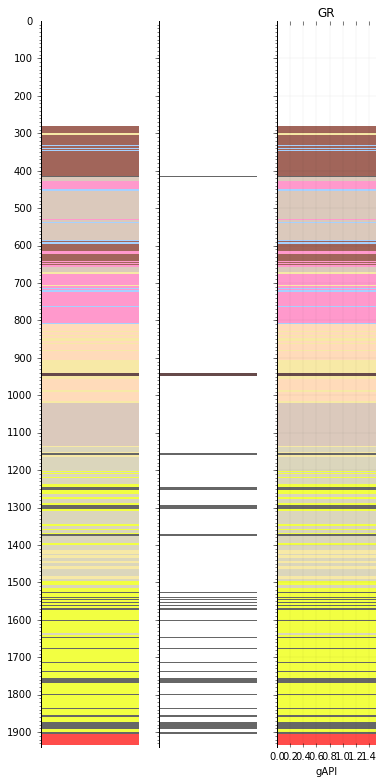

In [49]:
tracks = ['strip', 'muds', ['strip','GR']]
P129.plot(tracks=tracks, legend=complete_legend + mud_legend)